<a href="https://colab.research.google.com/github/0xemrekara/brent-cpi-analysis/blob/main/Brent-CPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation between Brent Price (USD) and TUFE: 0.0430

ADF Test for Brent Price (USD)
ADF Statistic: -3.0391
p-value: 0.0314
Critical Values:
   1%: -3.4582
   5%: -2.8738
   10%: -2.5733

ADF Test for TUFE
ADF Statistic: 2.5010
p-value: 0.9991
Critical Values:
   1%: -3.4596
   5%: -2.8744
   10%: -2.5736

ADF Test for Differenced TUFE
ADF Statistic: -0.0963
p-value: 0.9498
Critical Values:
   1%: -3.4596
   5%: -2.8744
   10%: -2.5736

ADF Test for Second Differenced TUFE
ADF Statistic: -6.4574
p-value: 0.0000
Critical Values:
   1%: -3.4596
   5%: -2.8744
   10%: -2.5736

Granger Causality Test (USD-based)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1598  , p=0.0768  , df_denom=233, df_num=1
ssr based chi2 test:   chi2=3.2005  , p=0.0736  , df=1
likelihood ratio test: chi2=3.1790  , p=0.0746  , df=1
parameter F test:         F=3.1598  , p=0.0768  , df_denom=233, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2913

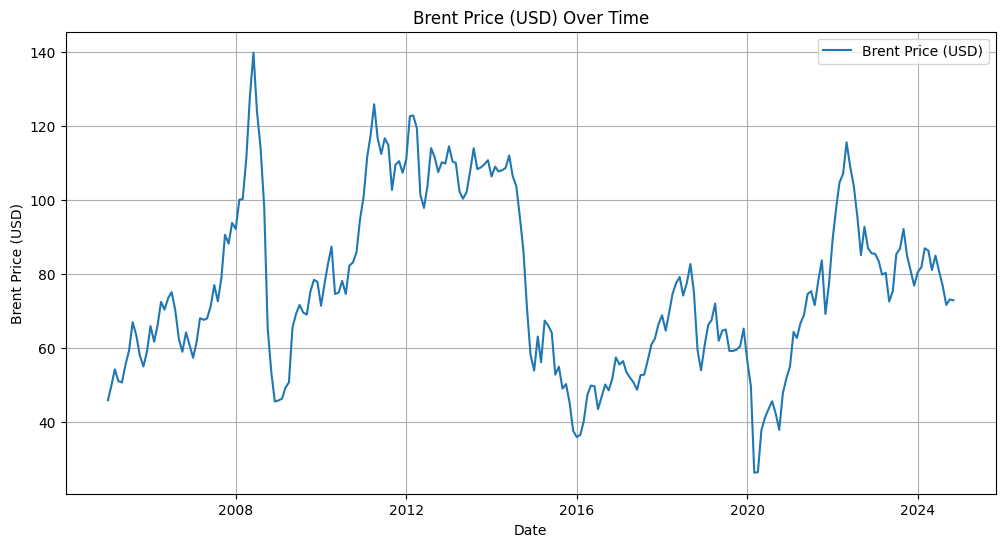

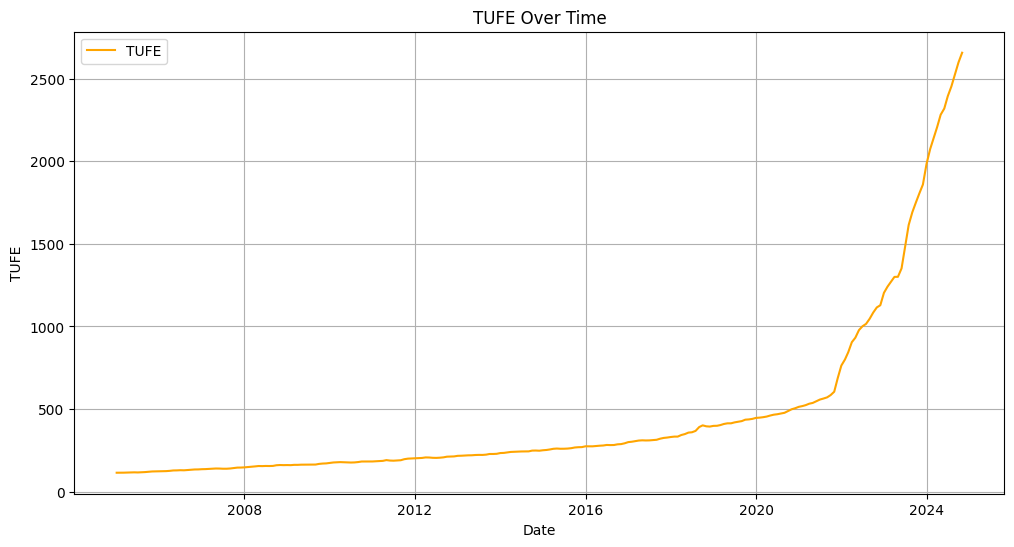

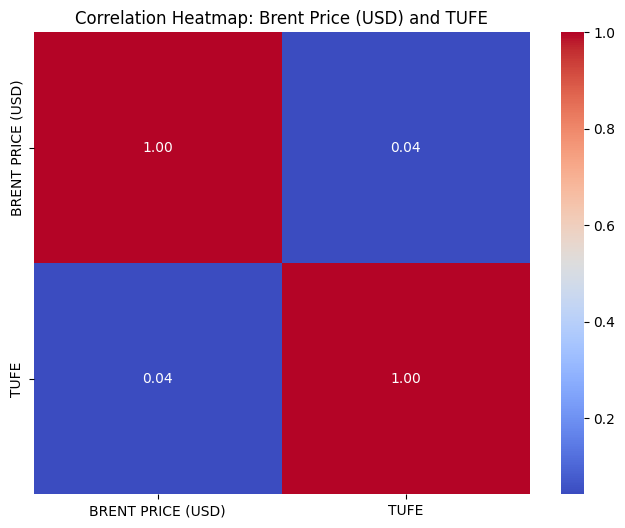

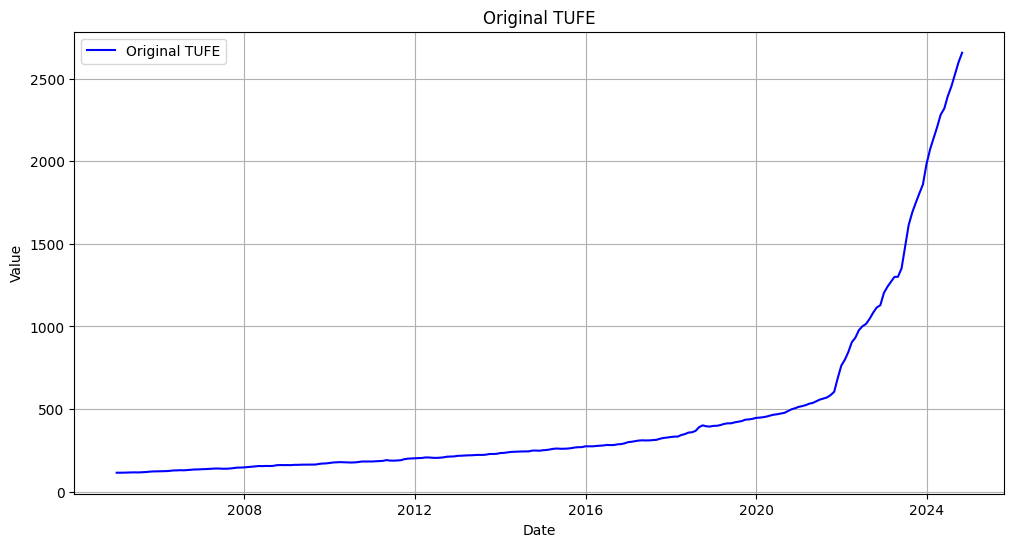

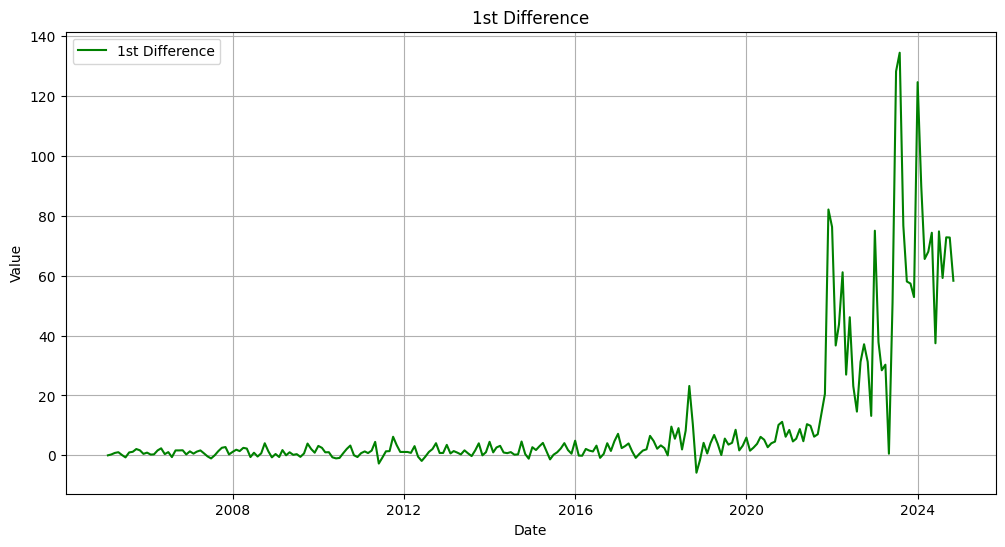

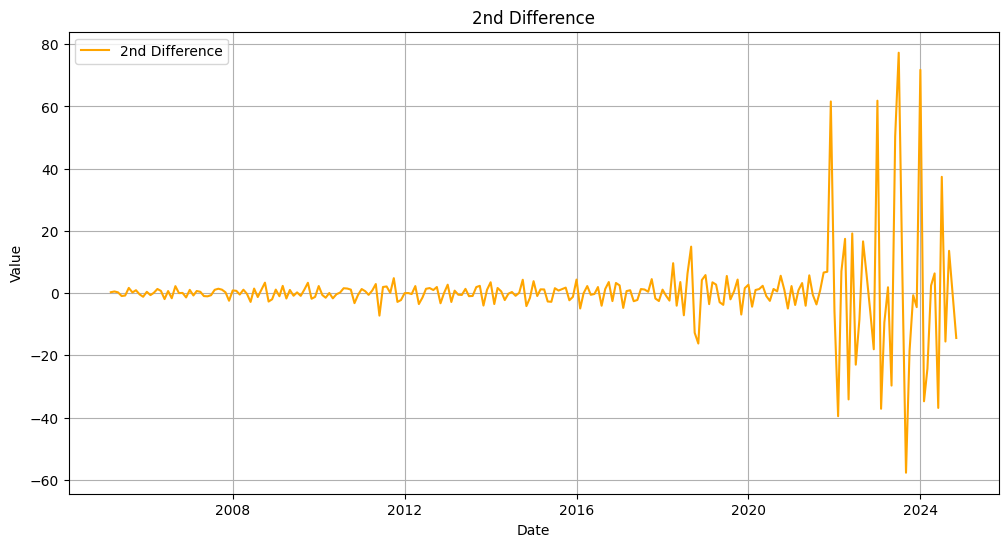

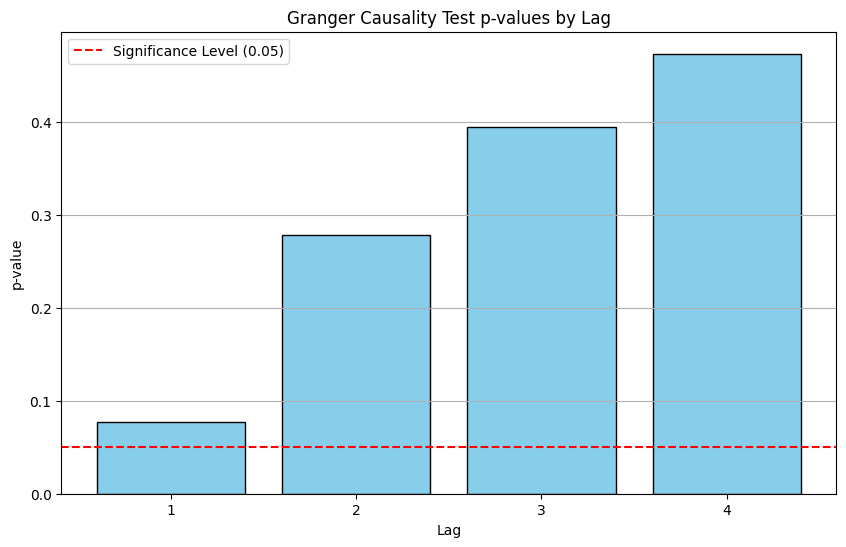


Correlation between TRY-based Brent Price and TUFE: 0.9679


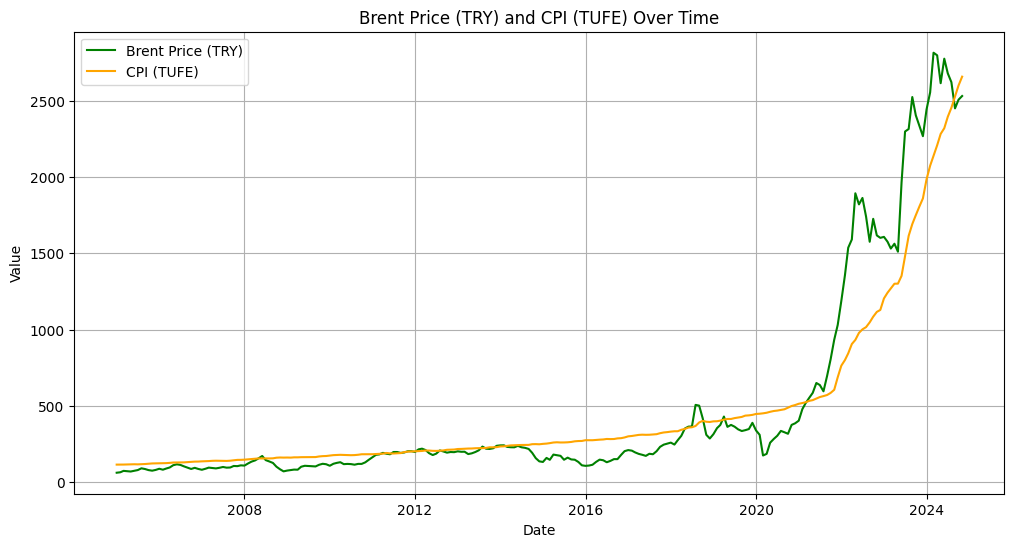


ADF Test for Brent Price (TRY)
ADF Statistic: 2.4900
p-value: 0.9990
Critical Values:
   1%: -3.4599
   5%: -2.8745
   10%: -2.5737

ADF Test for Differenced Brent Price (TRY)
ADF Statistic: -2.5843
p-value: 0.0963
Critical Values:
   1%: -3.4602
   5%: -2.8746
   10%: -2.5738

ADF Test for 2nd Differenced Brent Price (TRY)
ADF Statistic: -7.5101
p-value: 0.0000
Critical Values:
   1%: -3.4603
   5%: -2.8747
   10%: -2.5738

ADF Test for TUFE
ADF Statistic: 2.5010
p-value: 0.9991
Critical Values:
   1%: -3.4596
   5%: -2.8744
   10%: -2.5736

ADF Test for Differenced TUFE
ADF Statistic: -0.0963
p-value: 0.9498
Critical Values:
   1%: -3.4596
   5%: -2.8744
   10%: -2.5736

ADF Test for 2nd Differenced TUFE
ADF Statistic: -6.4574
p-value: 0.0000
Critical Values:
   1%: -3.4596
   5%: -2.8744
   10%: -2.5736

Granger Causality Test Results (TRY-Based)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0099  , p=0.9209  , df_denom=233, df_num=1
ssr based chi2 tes

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsu249dap/adykgp6h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsu249dap/5lqeod2j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3977', 'data', 'file=/tmp/tmpsu249dap/adykgp6h.json', 'init=/tmp/tmpsu249dap/5lqeod2j.json', 'output', 'file=/tmp/tmpsu249dap/prophet_model3fvpvw5c/prophet_model-20250323124348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:43:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: Futur

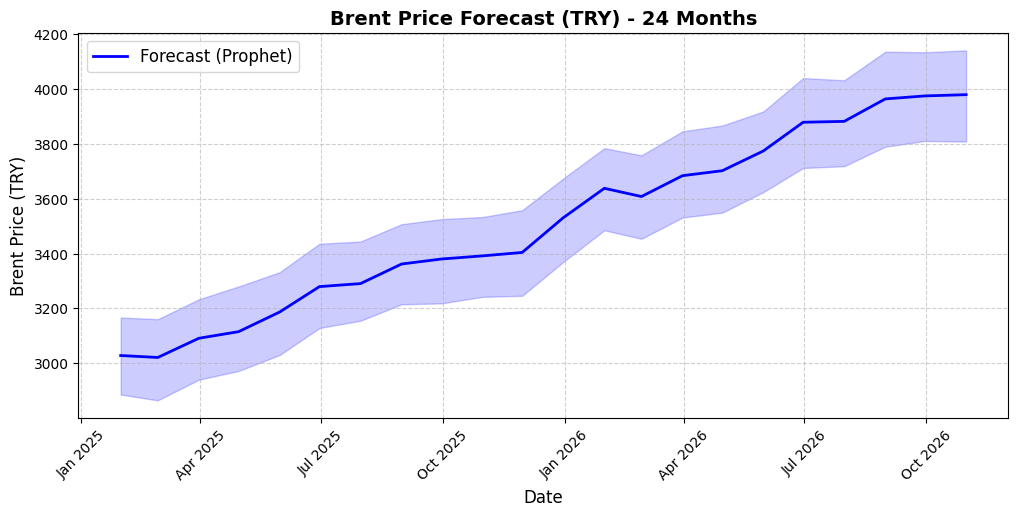

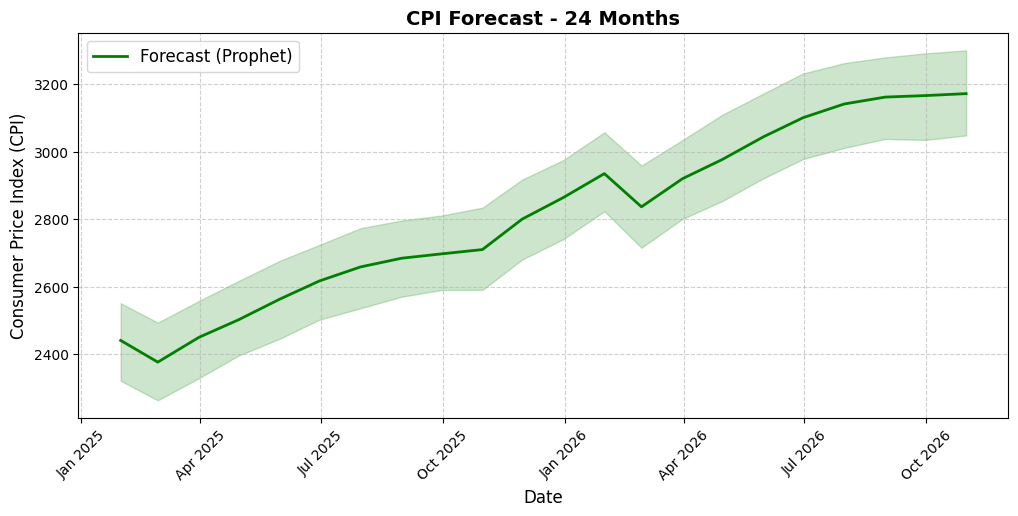

In [2]:
# @title USD BASED CALCULATIONS

# 1. Data Loading and Initial Inspection | Based on USD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from prophet import Prophet

logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

data = pd.read_excel("BRENT_TUFE_DATA.xlsx")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 2. Correlation Analysis | BRENT(USD) & TUFE
correlation = data['BRENT PRICE (USD)'].corr(data['TUFE'])
print(f"Correlation between Brent Price (USD) and TUFE: {correlation:.4f}")

# 3. Stationarity Check (ADF Test)
def adf_test(series, label):
    result = adfuller(series.dropna())
    print(f"\nADF Test for {label}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:")
    for k, v in result[4].items():
        print(f"   {k}: {v:.4f}")

adf_test(data['BRENT PRICE (USD)'], 'Brent Price (USD)')
adf_test(data['TUFE'], 'TUFE')

# 4. Differencing TUFE
data['TUFE_diff'] = data['TUFE'].diff()
data['TUFE_diff2'] = data['TUFE_diff'].diff()
adf_test(data['TUFE_diff'], 'Differenced TUFE')
adf_test(data['TUFE_diff2'], 'Second Differenced TUFE')

# 5. Granger Causality Test | USD-based
print("\nGranger Causality Test (USD-based)")
grangercausalitytests(data[['BRENT PRICE (USD)', 'TUFE_diff2']].dropna(), maxlag=4)

# 6. USD-Based Time Series Visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['BRENT PRICE (USD)'], label='Brent Price (USD)')
plt.title("Brent Price (USD) Over Time")
plt.xlabel("Date")
plt.ylabel("Brent Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['TUFE'], label='TUFE', color='orange')
plt.title("TUFE Over Time")
plt.xlabel("Date")
plt.ylabel("TUFE")
plt.legend()
plt.grid(True)
plt.show()

# 7. Correlation Heatmap
correlation_matrix = data[['BRENT PRICE (USD)', 'TUFE']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Brent Price (USD) and TUFE")
plt.show()

# 8. Time Series Stationarity Visualization
for col, label, color in zip(['TUFE', 'TUFE_diff', 'TUFE_diff2'],
                             ['Original TUFE', '1st Difference', '2nd Difference'],
                             ['blue', 'green', 'orange']):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[col], label=label, color=color)
    plt.title(label)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# 9. Granger Causality p-value Visualization
p_values = [0.0773, 0.2783, 0.3946, 0.4734]
lags = [1, 2, 3, 4]

plt.figure(figsize=(10, 6))
plt.bar(lags, p_values, color='skyblue', edgecolor='black')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title("Granger Causality Test p-values by Lag")
plt.xlabel("Lag")
plt.ylabel("p-value")
plt.xticks(ticks=lags)
plt.legend()
plt.grid(axis='y')
plt.show()

# @title TRY BASED CALCULATIONS

# 10. Correlation and Visualization | TRY-Based
data['BRENT_PRICE_TRY'] = data['BRENT PRICE (USD)'] * (data['USDTRY'] / 10000)
print(f"\nCorrelation between TRY-based Brent Price and TUFE: {data['BRENT_PRICE_TRY'].corr(data['TUFE']):.4f}")

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['BRENT_PRICE_TRY'], label='Brent Price (TRY)', color='green')
plt.plot(data.index, data['TUFE'], label='CPI (TUFE)', color='orange')
plt.title('Brent Price (TRY) and CPI (TUFE) Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# 11. ADF Tests | TRY-Based
adf_test(data['BRENT_PRICE_TRY'], "Brent Price (TRY)")
adf_test(data['BRENT_PRICE_TRY'].diff(), "Differenced Brent Price (TRY)")
adf_test(data['BRENT_PRICE_TRY'].diff().diff(), "2nd Differenced Brent Price (TRY)")
adf_test(data['TUFE'], "TUFE")
adf_test(data['TUFE'].diff(), "Differenced TUFE")
adf_test(data['TUFE'].diff().diff(), "2nd Differenced TUFE")

# 12. Granger Causality Test | TRY-Based
data_granger = pd.DataFrame({
    'Brent_Price_TRY_Diff2': data['BRENT_PRICE_TRY'].diff().diff(),
    'TUFE_Diff2': data['TUFE'].diff().diff()
}).dropna()

print("\nGranger Causality Test Results (TRY-Based)")
grangercausalitytests(data_granger, maxlag=4, verbose=True)

# 13. Forecasting Using Prophet
df_brent = data.reset_index()[['Date', 'BRENT_PRICE_TRY']].rename(columns={'Date': 'ds', 'BRENT_PRICE_TRY': 'y'})
df_tufe = data.reset_index()[['Date', 'TUFE']].rename(columns={'Date': 'ds', 'TUFE': 'y'})

model_brent = Prophet(weekly_seasonality=False, daily_seasonality=False)
model_brent.fit(df_brent)
future_brent = model_brent.make_future_dataframe(periods=24, freq='M')
forecast_brent = model_brent.predict(future_brent)

model_tufe = Prophet(weekly_seasonality=False, daily_seasonality=False)
model_tufe.fit(df_tufe)
future_tufe = model_tufe.make_future_dataframe(periods=24, freq='M')
forecast_tufe = model_tufe.predict(future_tufe)

forecast_brent = forecast_brent[forecast_brent['ds'] >= "2025-01-01"]
forecast_tufe = forecast_tufe[forecast_tufe['ds'] >= "2025-01-01"]

# 14. Forecast Plotting
def plot_forecast(forecast, title, ylabel, color):
    plt.figure(figsize=(12, 5))
    plt.plot(forecast['ds'], forecast['yhat'], label="Forecast (Prophet)", linestyle="solid", color=color, linewidth=2)
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color=color, alpha=0.2)
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Date", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

plot_forecast(forecast_brent, "Brent Price Forecast (TRY) - 24 Months", "Brent Price (TRY)", "blue")
plot_forecast(forecast_tufe, "CPI Forecast - 24 Months", "Consumer Price Index (CPI)", "green")